# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yusuf Agung Rizky Afandi
- **Email:** m279b4ky4579@bangkit.academy
- **ID Dicoding:** yusuf_agriafan29

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?
- Seberapa besar pengaruh hari kerja (workingday) terhadap total penyewaan sepeda dibandingkan dengan akhir pekan dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [56]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [57]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [59]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [60]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- dalam tabel day_df tidak ada missing value ataupun duplikasi

#### Menilai tabel `hour_df`

In [51]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [52]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [54]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dalam tabel hour_df tidak ada missing value ataupun duplikasi

### Cleaning Data

In [71]:
day_df['season'] = pd.to_numeric(day_df['season'], errors='coerce')
day_df['casual'] = pd.to_numeric(day_df['casual'], errors='coerce')
day_df['registered'] = pd.to_numeric(day_df['registered'], errors='coerce')

**Insight:**
- Karena tidak ada missing value, data duplikasi dan bagainya maka dataset bersih dan tidak ada data yang salah atau hilang sehingga tidak perlu cleanning data

## Exploratory Data Analysis (EDA)

### Explore `day_df`

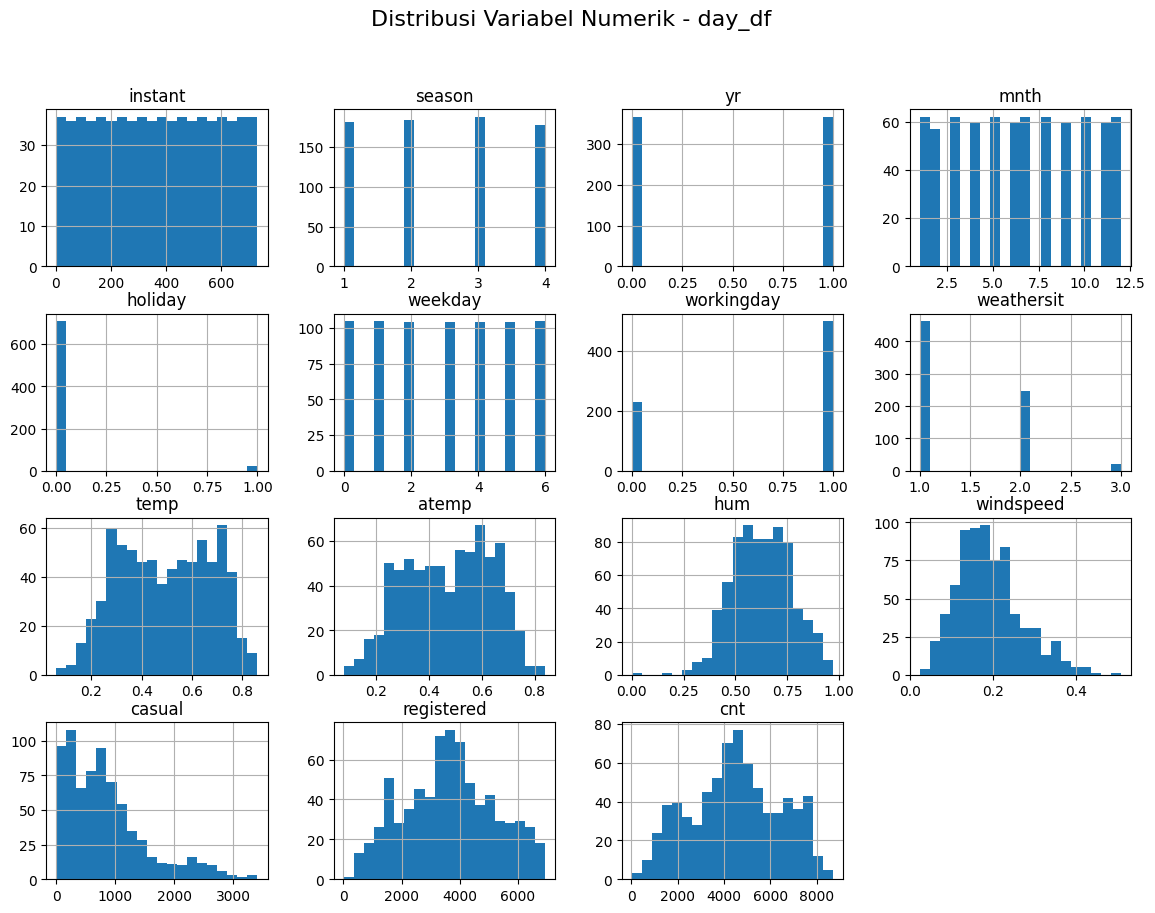

In [61]:
day_df.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribusi Variabel Numerik - day_df", fontsize=16)
plt.show()

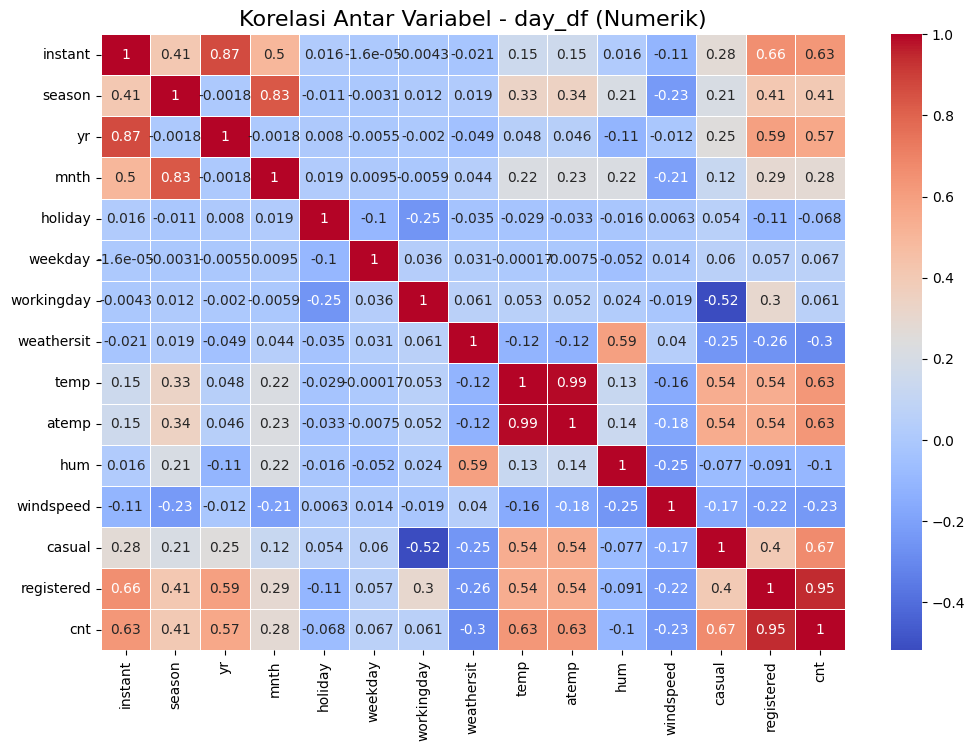

In [66]:
numeric_columns = day_df.select_dtypes(include=["float64", "int64"]).columns
day_numeric_df = day_df[numeric_columns]

plt.figure(figsize=(12,8))
sns.heatmap(day_numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Variabel - day_df (Numerik)", fontsize=16)
plt.show()

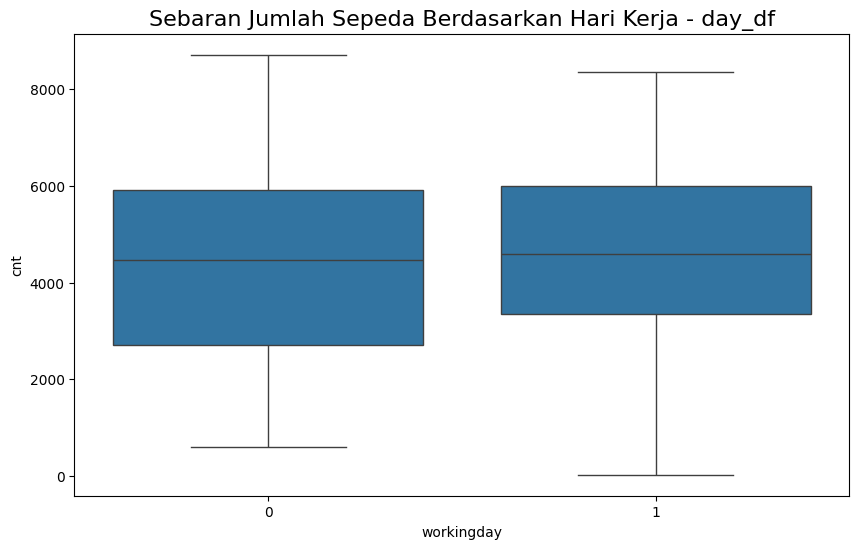

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x="workingday", y="cnt", data=day_df)
plt.title("Sebaran Jumlah Sepeda Berdasarkan Hari Kerja - day_df", fontsize=16)
plt.show()

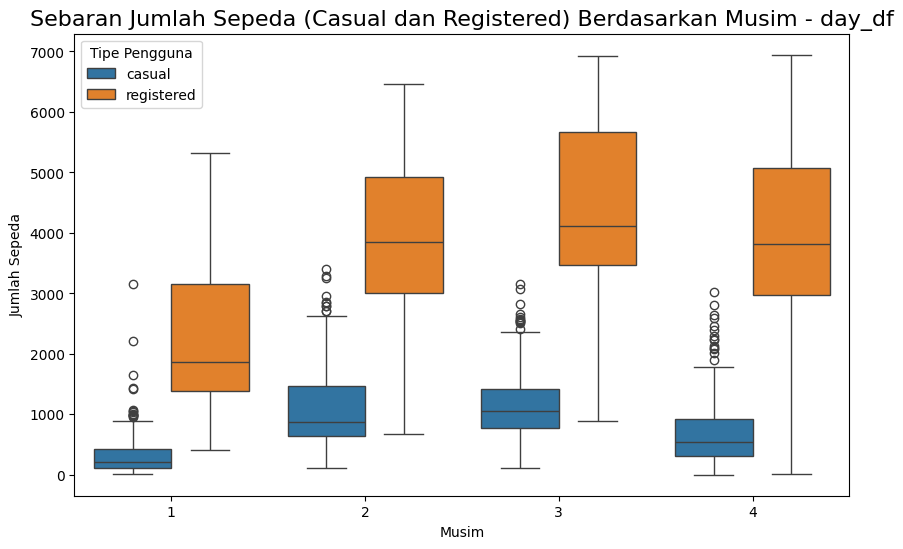

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x="season", y="value", hue="variable", 
            data=pd.melt(day_df, id_vars=["season"], value_vars=["casual", "registered"]))
plt.title("Sebaran Jumlah Sepeda (Casual dan Registered) Berdasarkan Musim - day_df", fontsize=16)
plt.xlabel("Musim")
plt.ylabel("Jumlah Sepeda")
plt.legend(title="Tipe Pengguna")
plt.show()

### Explore `hour_df`

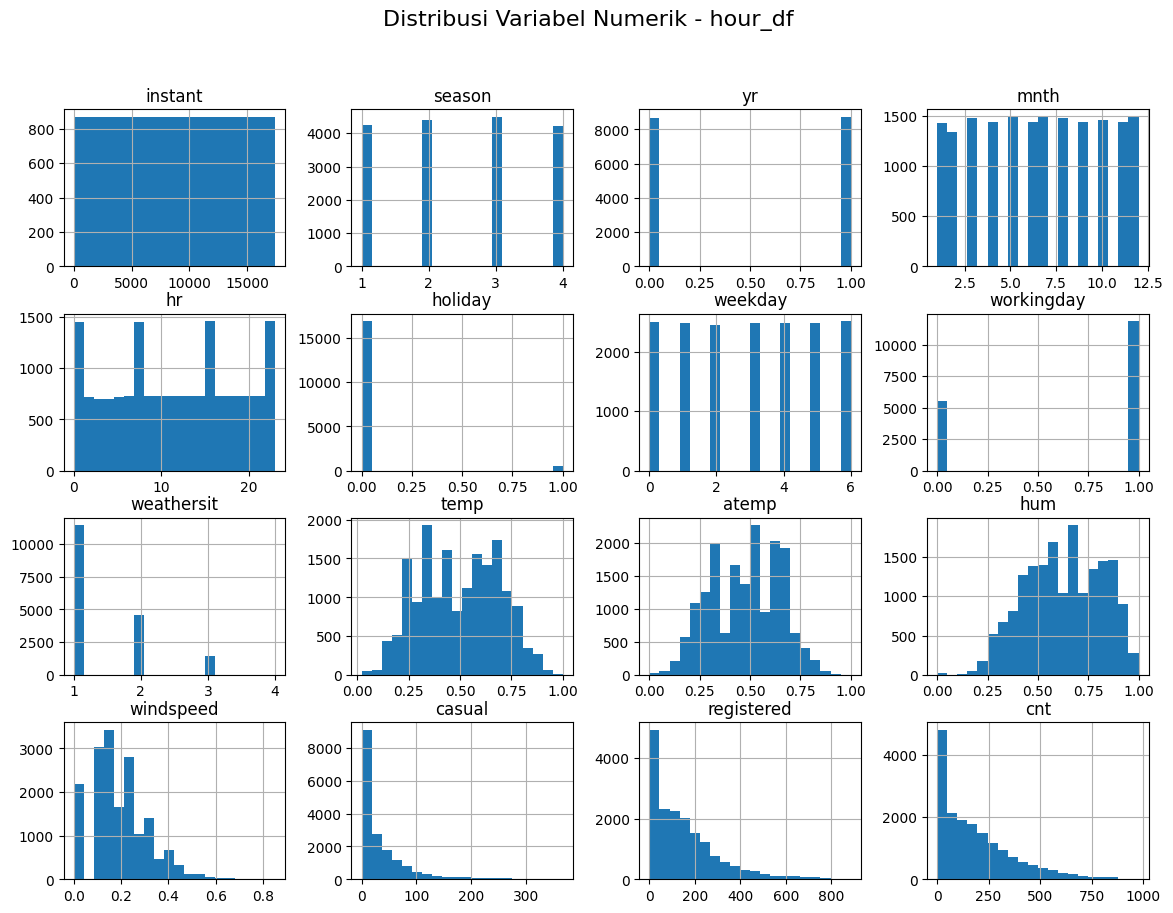

In [73]:
hour_df.hist(bins=20, figsize=(14,10))
plt.suptitle("Distribusi Variabel Numerik - hour_df", fontsize=16)
plt.show()

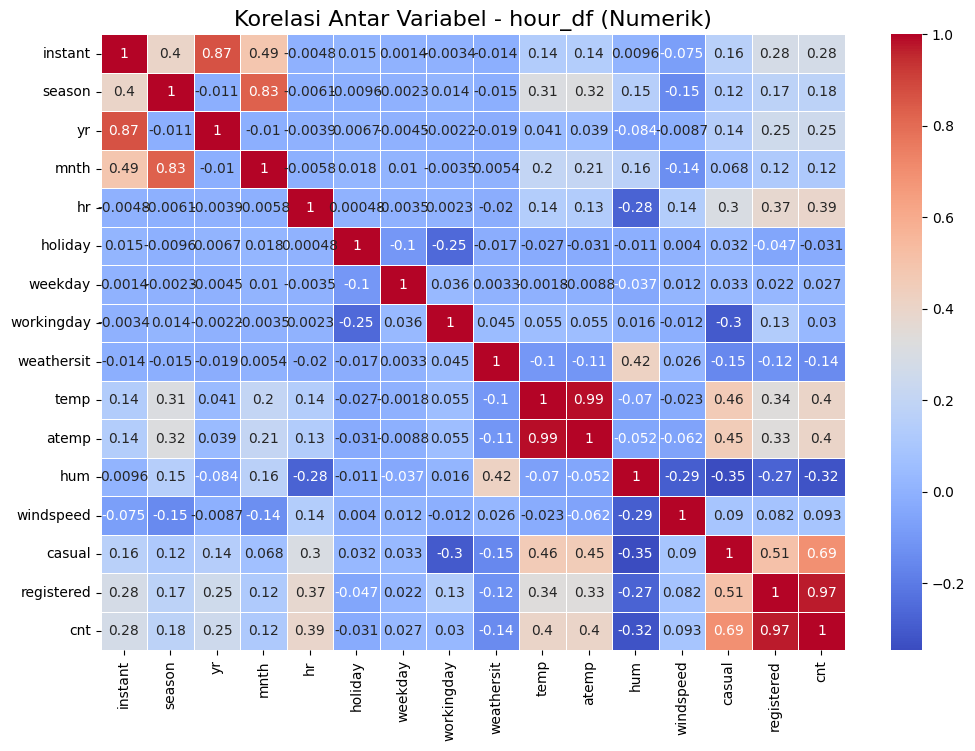

In [74]:
numeric_columns = hour_df.select_dtypes(include=["float64", "int64"]).columns
hour_numeric_df = hour_df[numeric_columns]

plt.figure(figsize=(12,8))
sns.heatmap(hour_numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Variabel - hour_df (Numerik)", fontsize=16)
plt.show()

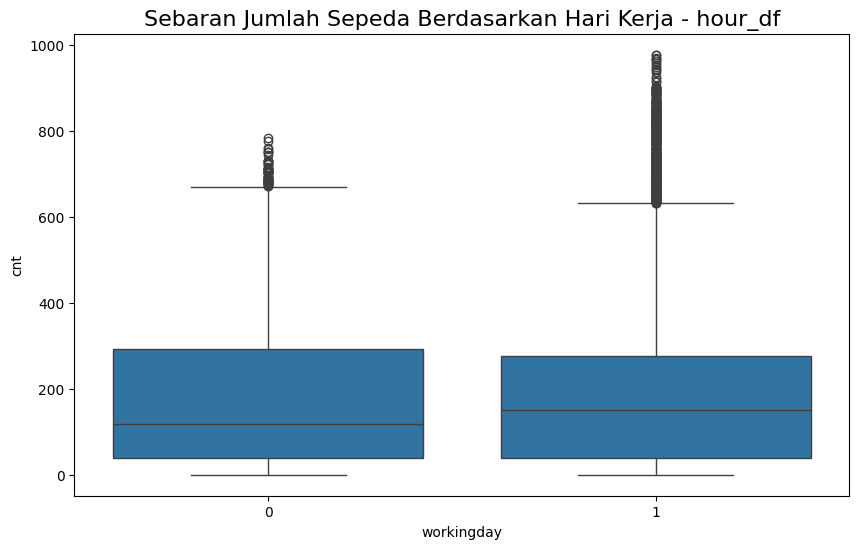

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x="workingday", y="cnt", data=hour_df)
plt.title("Sebaran Jumlah Sepeda Berdasarkan Hari Kerja - hour_df", fontsize=16)
plt.show()

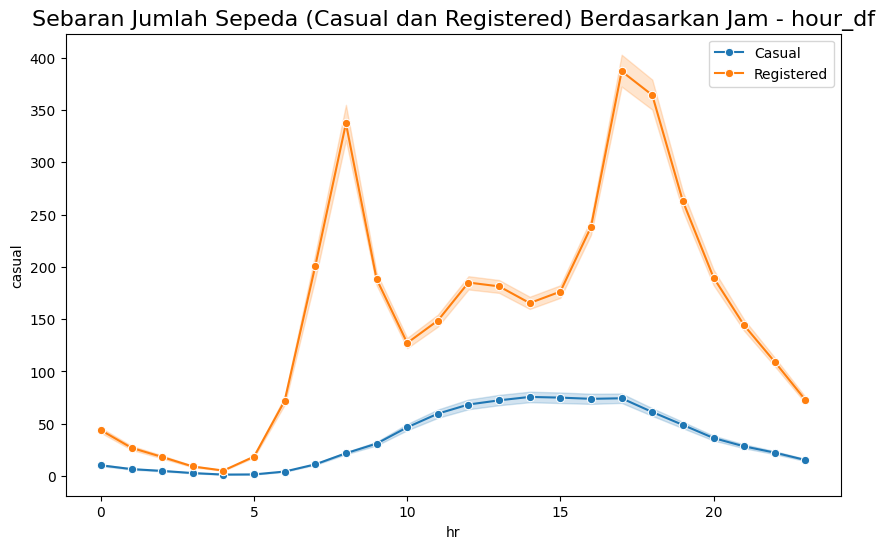

In [77]:
plt.figure(figsize=(10,6))
sns.lineplot(x="hr", y="casual", data=hour_df, label="Casual", marker="o")
sns.lineplot(x="hr", y="registered", data=hour_df, label="Registered", marker="o")
plt.title("Sebaran Jumlah Sepeda (Casual dan Registered) Berdasarkan Jam - hour_df", fontsize=16)
plt.legend()
plt.show()

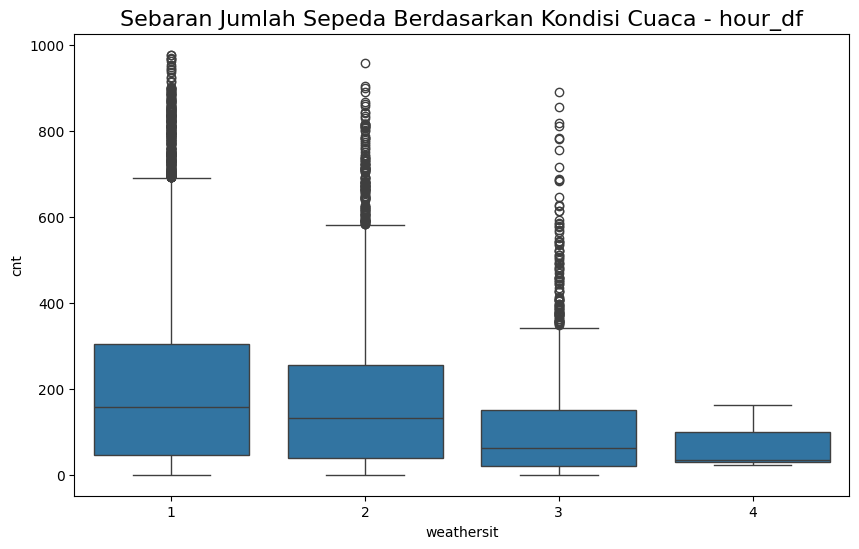

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x="weathersit", y="cnt", data=hour_df)
plt.title("Sebaran Jumlah Sepeda Berdasarkan Kondisi Cuaca - hour_df", fontsize=16)
plt.show()

In [87]:
import pandas as pd

day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

all_df = pd.concat([day_df, hour_df], ignore_index=True)

all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?

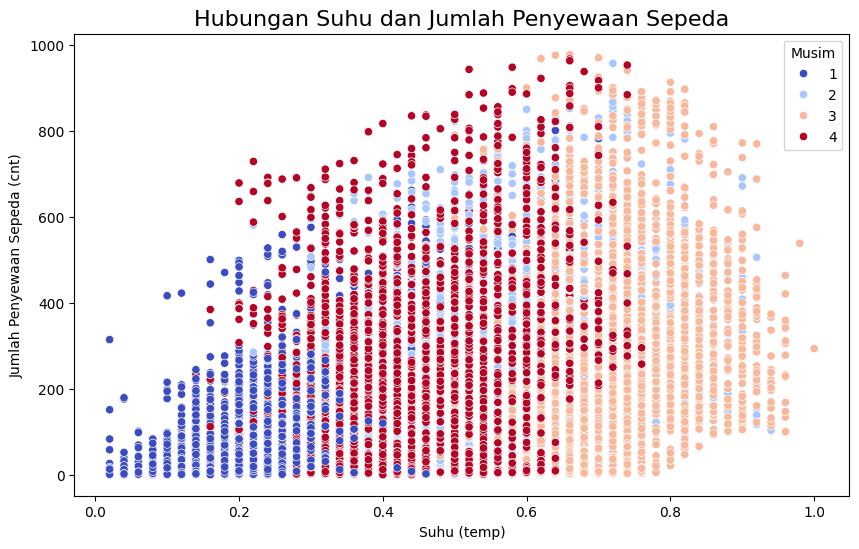

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="temp", y="cnt", data=hour_df, hue="season", palette="coolwarm")
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda", fontsize=16)
plt.xlabel("Suhu (temp)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.legend(title="Musim")
plt.show()

- Hubungan Positif: Dari hasil visualisasi scatter plot, terlihat bahwa terdapat hubungan positif antara suhu (temp) dan jumlah penyewaan sepeda (cnt). Ini berarti ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.
- Optimal pada Suhu Sedang: Namun, peningkatan penyewaan sepeda lebih optimal pada suhu sedang (sekitar 0.5 hingga 0.75 dalam skala dataset). Pada suhu yang terlalu tinggi atau terlalu rendah, jumlah penyewaan sepeda sedikit menurun, yang kemungkinan disebabkan karena cuaca terlalu panas atau terlalu dingin tidak nyaman untuk bersepeda.

### Pertanyaan 2: Seberapa besar pengaruh hari kerja (workingday) terhadap total penyewaan sepeda dibandingkan dengan akhir pekan dan hari libur?

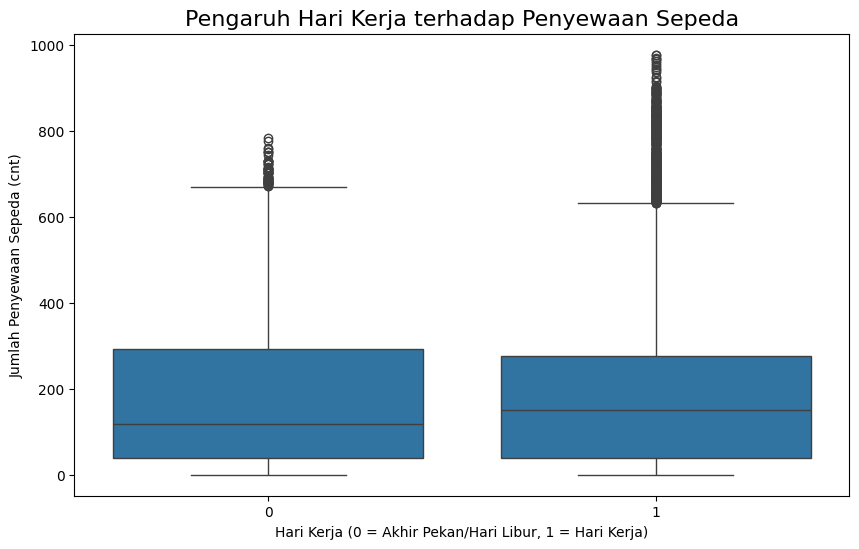

Rata-rata penyewaan sepeda pada hari kerja: 193.20775389801938
Rata-rata penyewaan sepeda pada akhir pekan dan hari libur: 181.40533188248097


In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(x="workingday", y="cnt", data=hour_df)
plt.title("Pengaruh Hari Kerja terhadap Penyewaan Sepeda", fontsize=16)
plt.xlabel("Hari Kerja (0 = Akhir Pekan/Hari Libur, 1 = Hari Kerja)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.show()

average_workingday = hour_df.groupby("workingday")["cnt"].mean()
print("Rata-rata penyewaan sepeda pada hari kerja:", average_workingday[1])
print("Rata-rata penyewaan sepeda pada akhir pekan dan hari libur:", average_workingday[0])

- Hari Kerja vs Akhir Pekan/Hari Libur: Dari boxplot yang menggambarkan distribusi penyewaan sepeda berdasarkan kolom workingday, terlihat bahwa penyewaan sepeda lebih tinggi pada hari kerja (workingday = 1) dibandingkan akhir pekan atau hari libur (workingday = 0).
- Pengguna Terdaftar vs Kasual: Hal ini terutama disebabkan oleh pengguna terdaftar (registered), yang cenderung lebih sering menggunakan sepeda pada hari kerja untuk keperluan komuter. Di sisi lain, penyewaan oleh pengguna kasual (casual) lebih tinggi pada akhir pekan dan hari libur, yang menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk rekreasi di luar jam kerja.

## Conclusion

- Hubungan Suhu dan Penyewaan Sepeda: Terdapat hubungan positif antara suhu (temp) dan jumlah penyewaan sepeda (cnt). Saat suhu meningkat, jumlah penyewaan sepeda juga bertambah, terutama pada suhu yang sedang. Suhu yang terlalu panas atau terlalu dingin cenderung menurunkan jumlah penyewaan, karena kondisi cuaca ekstrem kurang nyaman untuk bersepeda.

- Pengaruh Hari Kerja vs Akhir Pekan dan Hari Libur: Hari kerja memiliki pengaruh signifikan terhadap total penyewaan sepeda. Pengguna terdaftar (registered) lebih sering menyewa sepeda pada hari kerja, mungkin untuk keperluan komuter. Sebaliknya, pengguna kasual (casual) lebih aktif pada akhir pekan dan hari libur, kemungkinan untuk rekreasi atau aktivitas santai. Hal ini menunjukkan bahwa pola penggunaan sepeda sangat bergantung pada tujuan penggunaannya—komuter di hari kerja dan rekreasi di akhir pekan atau hari libur.

Secara keseluruhan, suhu dan hari dalam seminggu memainkan peran penting dalam mempengaruhi jumlah penyewaan sepeda, dengan motivasi pengguna yang berbeda antara pengguna terdaftar dan kasual.